<a href="https://colab.research.google.com/github/hritik7080/Weather-Prediction-Time-Series-Forecasting/blob/master/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Set

Given dataset provides the weather data for city Delhi, India. We will try to analyze the weather and predict the temperature field _tempm in the datset with ***Time Series Forecasting***.

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "Your Username"
os.environ['KAGGLE_KEY'] = "Your Kaggle Key"

In [0]:
!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 70.4MB/s]


In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile('/content/delhi-weather-data.zip', 'r') as zipObj:
   zipObj.extractall()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [0]:
df = pd.read_csv("/content/testset.csv")

In [187]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [188]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

### Part 1: A quick analysis of Weather in Delhi

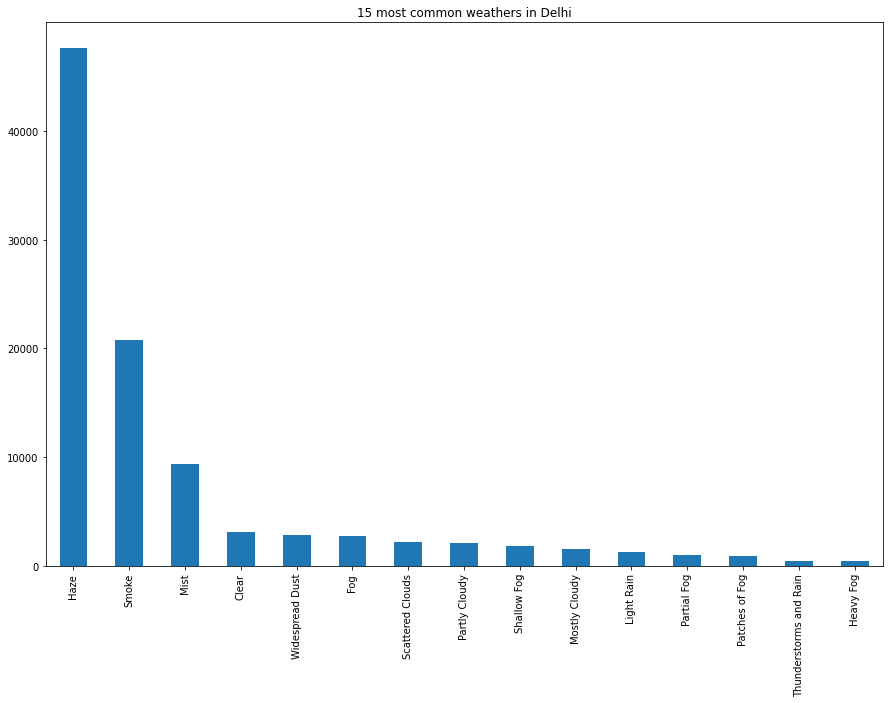

In [189]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Delhi')
plt.show()

It is clearly visible that Haze and Smoke are most common weatehrs in Delhi

[]

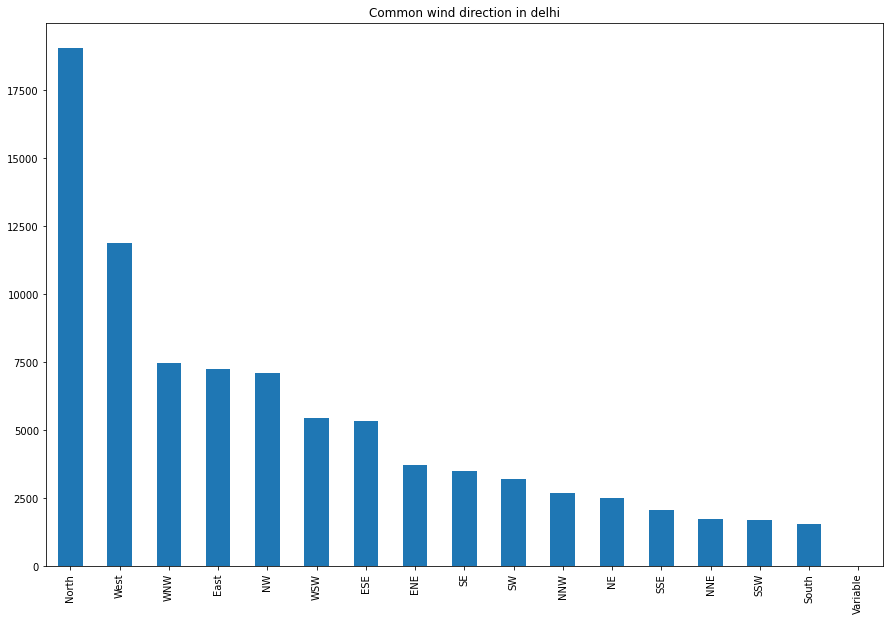

In [190]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

North and West are the most common wind directions in dehi.

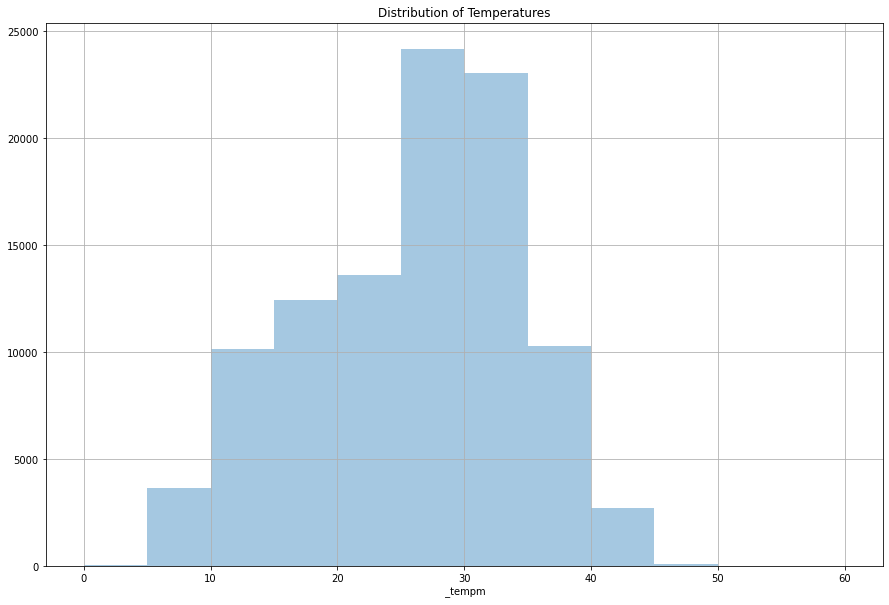

In [191]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

Most common temperature scale in Delhi is from 25 to 35 degree.

In [0]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [193]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [194]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [0]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [196]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()

0

In [197]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [0]:
def get_year(x):
  return x[0:4]

def get_month(x):
  return x[5:7]

In [0]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [200]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [0]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

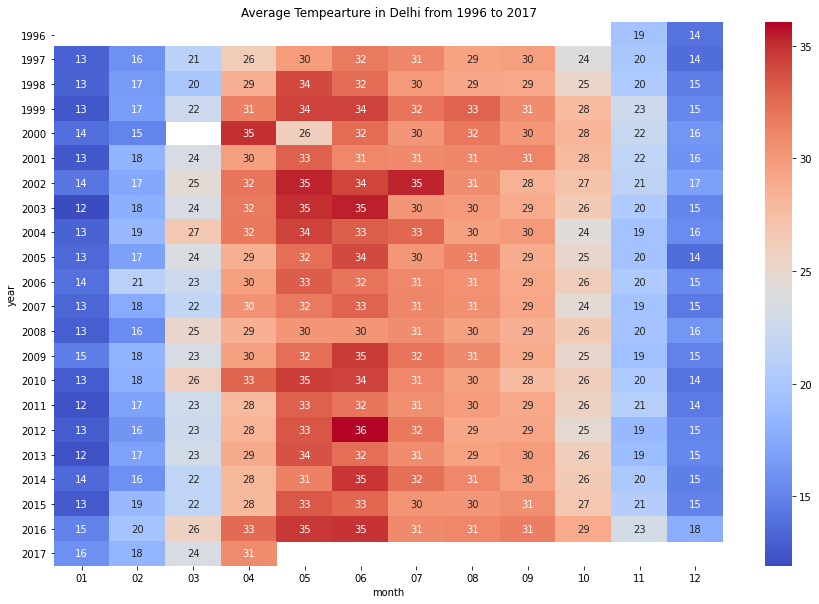

In [202]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [203]:
df[' _hum'].isna().sum()

757

In [0]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [0]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

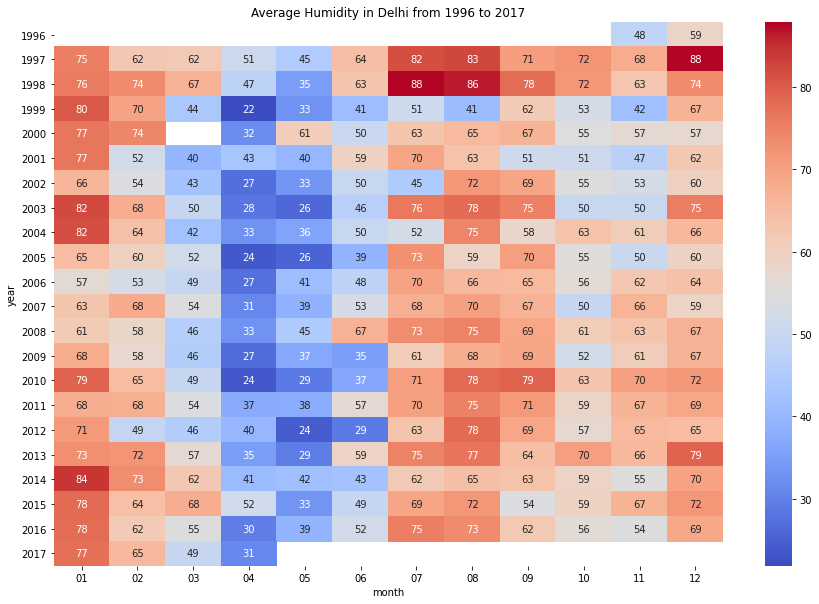

In [206]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()

## Time Series Forecasting

In [0]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [208]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [0]:
data = data.resample('D').mean()

In [210]:
data.temp.isna().sum()

141

In [0]:
data.fillna(data['temp'].mean(), inplace=True)

In [212]:
data.temp.isna().sum()

0

In [213]:
data.shape

(7480, 1)

In [214]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


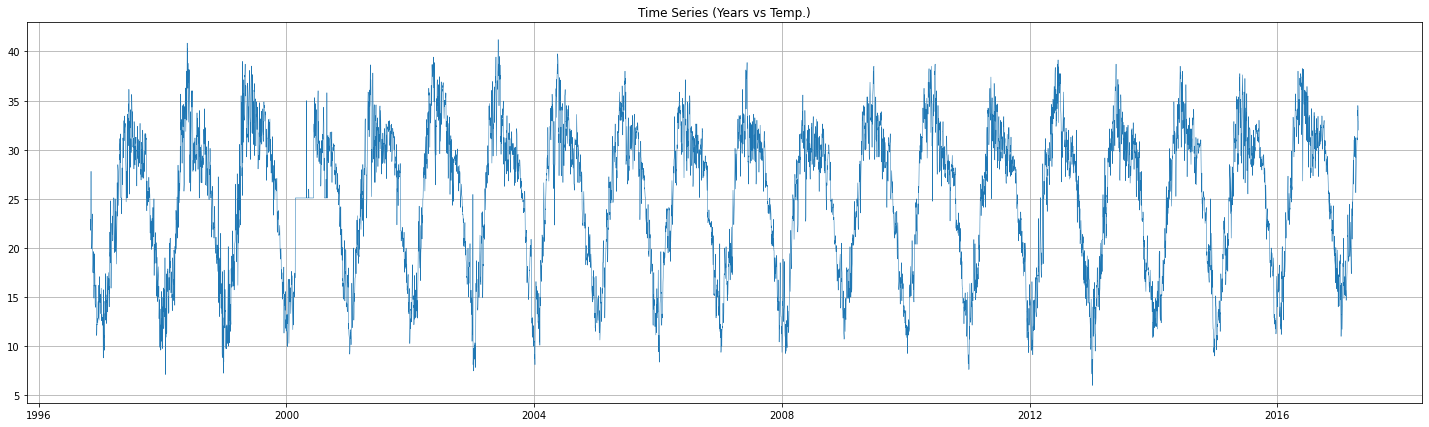

In [215]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [0]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [217]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [218]:
data_scaled.shape

(7480, 1)

In [0]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]   

In [220]:
X.shape

(7450, 30, 1)

In [221]:
Xtrain.shape

(7300, 30, 1)

In [222]:
Xtest.shape

(150, 30, 1)

In [0]:
import tensorflow as tf

In [0]:

from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout,Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [227]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )
regressor.save("./model.hdf5")

Epoch 1/300
229/229 [==============================] - 37s 162ms/step - loss: 0.0190
Epoch 2/300
229/229 [==============================] - 38s 166ms/step - loss: 0.0118
Epoch 3/300
229/229 [==============================] - 37s 161ms/step - loss: 0.0113
Epoch 4/300
229/229 [==============================] - 37s 163ms/step - loss: 0.0107
Epoch 5/300
229/229 [==============================] - 37s 162ms/step - loss: 0.0102
Epoch 6/300
229/229 [==============================] - 37s 163ms/step - loss: 0.0103
Epoch 7/300
229/229 [==============================] - 37s 163ms/step - loss: 0.0102
Epoch 8/300
229/229 [==============================] - 37s 161ms/step - loss: 0.0102
Epoch 9/300
229/229 [==============================] - 37s 163ms/step - loss: 0.0098
Epoch 10/300
229/229 [==============================] - 37s 162ms/step - loss: 0.0102
Epoch 11/300
229/229 [==============================] - 37s 163ms/step - loss: 0.0094
Epoch 12/300
229/229 [==============================] - 37s 161

In [243]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 29, 256)           768       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 28, 128)           65664     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1792)              0         
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 30, 1792)          0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 30, 100)           757200    
_________________________________________________________________
lstm_27 (LSTM)               (None, 30, 100)         

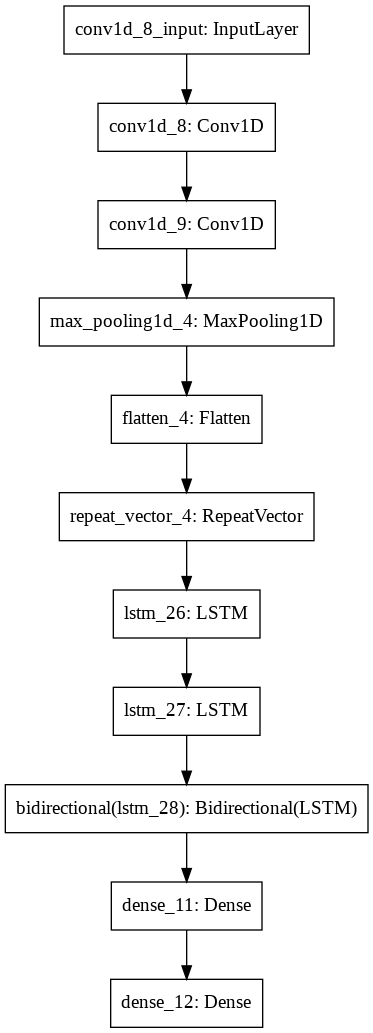

In [244]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
pred = model.predict(Xtest)

In [229]:
pred

array([[-0.02169233],
       [-0.09268853],
       [ 0.03123253],
       [-0.0448193 ],
       [-0.15719125],
       [-0.16035682],
       [-0.223876  ],
       [-0.2840667 ],
       [-0.25994548],
       [-0.23578055],
       [-0.2810439 ],
       [-0.33669636],
       [-0.31227526],
       [-0.30352867],
       [-0.27860266],
       [-0.34986916],
       [-0.37012774],
       [-0.37786183],
       [-0.39960787],
       [-0.32770252],
       [-0.22246714],
       [-0.36305   ],
       [-0.4153926 ],
       [-0.41775465],
       [-0.3593574 ],
       [-0.30446252],
       [-0.32255295],
       [-0.23267569],
       [-0.37225598],
       [-0.41726753],
       [-0.47666803],
       [-0.47972497],
       [-0.3603564 ],
       [-0.44580048],
       [-0.39889657],
       [-0.42020512],
       [-0.5226013 ],
       [-0.6273512 ],
       [-0.49390268],
       [-0.43406096],
       [-0.37300536],
       [-0.30064988],
       [-0.2942718 ],
       [-0.39898545],
       [-0.46510756],
       [-0

In [0]:
pred = scalar.inverse_transform(pred)

In [231]:
pred

array([[23.223364],
       [21.973457],
       [24.155119],
       [22.816208],
       [20.83787 ],
       [20.782139],
       [19.663868],
       [18.604195],
       [19.028854],
       [19.454285],
       [18.657412],
       [17.677635],
       [18.107574],
       [18.261562],
       [18.70039 ],
       [17.445724],
       [17.089067],
       [16.952906],
       [16.57006 ],
       [17.835974],
       [19.688671],
       [17.213673],
       [16.292168],
       [16.250584],
       [17.27868 ],
       [18.245121],
       [17.926634],
       [19.508947],
       [17.0516  ],
       [16.25916 ],
       [15.213397],
       [15.159578],
       [17.261095],
       [15.756828],
       [16.582584],
       [16.207441],
       [14.40473 ],
       [12.56058 ],
       [14.909977],
       [15.963506],
       [17.038406],
       [18.312243],
       [18.42453 ],
       [16.58102 ],
       [15.416923],
       [15.8779  ],
       [13.532671],
       [13.807069],
       [11.422476],
       [10.809644],


In [232]:
Ytest

array([[ 0.03912776],
       [ 0.00176654],
       [-0.06536214],
       [-0.11327022],
       [-0.21219211],
       [-0.21898356],
       [-0.24975087],
       [-0.13614848],
       [-0.26726457],
       [-0.28223943],
       [-0.28780039],
       [-0.30418535],
       [-0.38086697],
       [-0.23791729],
       [-0.40674307],
       [-0.20241654],
       [-0.209947  ],
       [-0.25874439],
       [-0.28682943],
       [-0.30891878],
       [-0.44145491],
       [-0.32301564],
       [-0.42725461],
       [-0.32650011],
       [-0.2161435 ],
       [-0.2955265 ],
       [-0.35895793],
       [-0.45754858],
       [-0.35711374],
       [-0.54559043],
       [-0.36707239],
       [-0.38370703],
       [-0.36283876],
       [-0.47526514],
       [-0.5401808 ],
       [-0.45626695],
       [-0.43692728],
       [-0.28998505],
       [-0.3688756 ],
       [-0.27862481],
       [-0.2962963 ],
       [-0.24351135],
       [-0.50535625],
       [-0.42218623],
       [-0.51313261],
       [-0

In [0]:
test = scalar.inverse_transform(Ytest)

In [234]:
test

array([[24.29411765],
       [23.63636364],
       [22.45454545],
       [21.61111111],
       [19.86956522],
       [19.75      ],
       [19.20833333],
       [21.20833333],
       [18.9       ],
       [18.63636364],
       [18.53846154],
       [18.25      ],
       [16.9       ],
       [19.41666667],
       [16.44444444],
       [20.04166667],
       [19.90909091],
       [19.05      ],
       [18.55555556],
       [18.16666667],
       [15.83333333],
       [17.91848787],
       [16.08333333],
       [17.85714286],
       [19.8       ],
       [18.4024414 ],
       [17.28571429],
       [15.55      ],
       [17.31818182],
       [14.        ],
       [17.14285714],
       [16.85      ],
       [17.2173913 ],
       [15.23809524],
       [14.0952381 ],
       [15.57256347],
       [15.91304348],
       [18.5       ],
       [17.11111111],
       [18.7       ],
       [18.38888889],
       [19.31818182],
       [14.70833333],
       [16.17256347],
       [14.57142857],
       [12

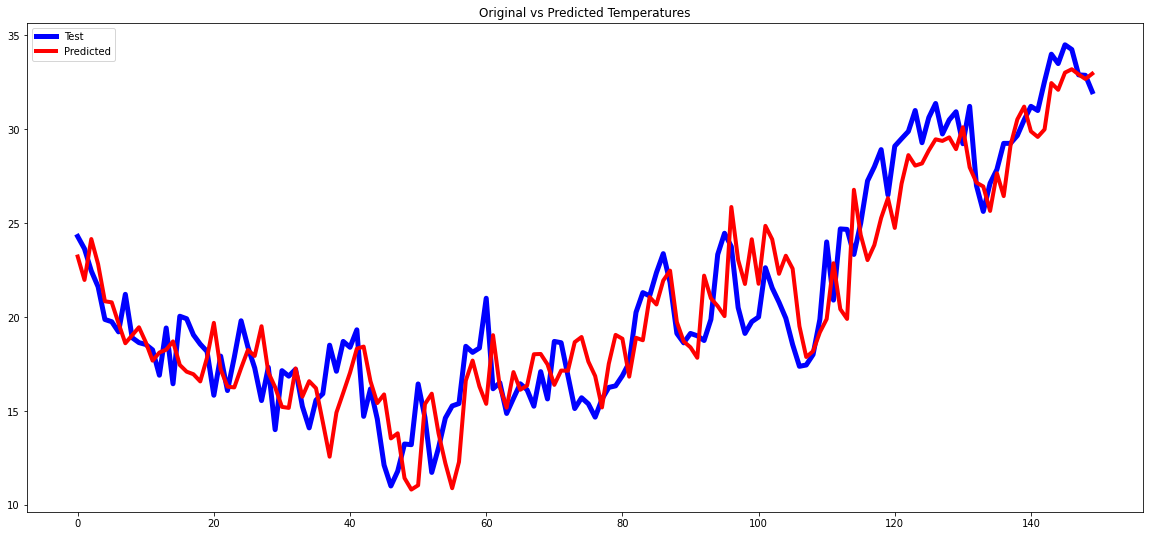

In [250]:
plt.figure(figsize=(20,9))
plt.plot(test , 'blue', linewidth=5)
plt.plot(pred,'r' , linewidth=4)
plt.title("Original vs Predicted Temperatures")
plt.legend(('Test','Predicted'))
plt.show()

In [236]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test, pred)

5.095490021836434